In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


## **Import some basic libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Divide the dataset into independent and dependent features

In [4]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Feature Engineering

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

**Concatenating these variables with the dataframe**

In [10]:
X = X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,geo,gender],axis=1)

### Splitting the dataset into Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

## Creating the ANN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

### **Initializing the ANN**

In [19]:
classifier = Sequential()

### **Adding the input Layers**

In [20]:
classifier.add(Dense(units=11,activation='relu'))

### **Adding the first hidden layer** 

In [21]:
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

### **Adding the second hidden layer**

In [22]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

### **Adding the output layer**

In [23]:
classifier.add(Dense(1,activation='sigmoid'))

In [24]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

### **Early Stopping**

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [27]:
model_histroy = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5321 - accuracy: 0.7850 - val_loss: 0.4582 - val_accuracy: 0.7970
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4703 - accuracy: 0.8041 - val_loss: 0.4335 - val_accuracy: 0.8152
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4488 - accuracy: 0.8119 - val_loss: 0.4176 - val_accuracy: 0.8232
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4369 - accuracy: 0.8182 - val_loss: 0.4086 - val_accuracy: 0.8296
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4187 - accuracy: 0.8235 - val_loss: 0.3978 - val_accuracy: 0.8304
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4060 - accuracy: 0.8336 - val_loss: 0.3903 - val_accuracy: 0.8304
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3946 - accuracy: 0.8369 - val_loss: 0.3823 - val_accuracy:

In [28]:
model_histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

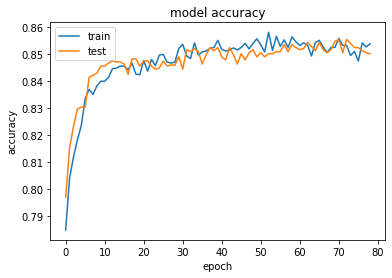

In [29]:
# Summarizing the history for accuracy
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

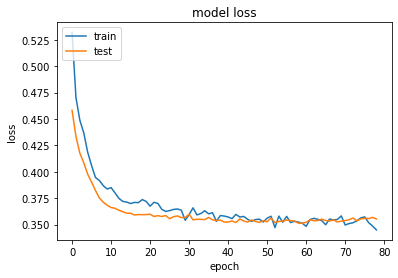

In [30]:
# Summarizing the history for loss
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [31]:
# making teh predictions and evaluating the model

# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 1ms/step


In [32]:
# Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1540,   55],
       [ 226,  179]])

In [33]:
# calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)


In [34]:
score

0.8595

In [35]:
# getting the weights
classifier.get_weights()

[array([[ 0.15160583, -0.307758  , -0.08260983,  0.06084516,  0.08436417,
          0.01940748, -0.13324475, -0.16981733, -0.00757455, -0.06897622,
          0.20640731],
        [ 0.40447703, -0.65870357,  0.76762974,  0.2699825 , -0.60571533,
         -0.653311  ,  0.10852181, -0.7416361 , -0.33626854,  0.19751427,
         -0.09467357],
        [-0.04116555, -0.03817423,  0.01489691,  0.0624014 , -0.00510617,
         -0.13140102,  0.01434736,  0.12991907,  0.17432132,  0.1849876 ,
          0.16060919],
        [-0.39449298,  0.26388526, -0.37714413, -0.0732537 , -0.3609438 ,
         -0.18637913, -0.9974134 , -0.32525253, -0.39345965,  0.10461067,
         -0.5868238 ],
        [-1.2218872 , -0.0498722 , -0.06283533,  1.1684291 , -0.05873809,
         -0.18507193, -1.1806922 , -0.02900889, -0.09036656, -0.8792293 ,
         -0.2533242 ],
        [-0.27152795, -0.03916273,  0.07669174, -0.02313683,  0.04779613,
          0.31423602,  0.01158751, -0.38738322, -0.08667419,  0.0439038